In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
from LMRt import visual as vs

from pprint import pprint
import os
import numpy as np
import pandas as pd
import pickle
import time
from pprint import pprint
from pathos.multiprocessing import ProcessingPool as Pool

In [2]:
# files to use
prior_filepath = '/home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/[vardef_template]_iCESM_past1000_085001-184912.nc'

dirpath = '/home/fzhu/Apps/LMRt/LMRt/data'

db_proxies_filename = 'LMRdb_v1.0.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v1.0.0_Metadata.df.pckl'
db_proxies_filepath = os.path.join(dirpath, db_proxies_filename)
db_metadata_filepath = os.path.join(dirpath, db_metadata_filename)

linear_precalib_filename = 'PSMs_LMRdb_v1.0.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v1.0.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'
precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv1.0.0.npz'
ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

In [3]:
%%time

save_dirpath = './results/jobs_All_multiprocessing'

seeds = np.arange(50)

def func_wrapper(seed):
    job = LMRt.ReconJob()
    job.run(prior_filepath, 'CMIP5', db_proxies_filepath, db_metadata_filepath,
                   precalib_filesdict=precalib_filesdict, ye_filesdict=ye_filesdict,
                   seed=seed, save_dirpath=save_dirpath)

with Pool(4) as pool:
    pool.map(func_wrapper, seeds)

pid=26758 >>> job.cfg created
pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
(12000, 96, 144)
(12000, 96, 144)
indlat= 0  indlon= 1
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for 

KF updating (pid=26759):   0%|          | 0/2001 [00:00<?, ?it/s]


pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   0%|          | 0/2001 [00:00<?, ?it/s]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   0%|          | 2/2001 [00:00<07:36,  4.38it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757): 100%|██████████| 2001/2001 [48:46<00:00,  2.52s/it]



pid=26757 >>> job.res created


KF updating (pid=26758): 100%|█████████▉| 1999/2001 [49:20<00:04,  2.02s/it]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r04.nc
-----------------------------------------------------

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758): 100%|█████████▉| 2000/2001 [49:22<00:01,  1.97s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26758): 100%|██████████| 2001/2001 [49:23<00:00,  1.73s/it]



pid=26758 >>> job.res created


KF updating (pid=26759): 100%|█████████▉| 1995/2001 [49:28<00:15,  2.59s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759): 100%|█████████▉| 1998/2001 [49:32<00:05,  1.79s/it]



pid=26756 >>> job.res created


KF updating (pid=26759): 100%|██████████| 2001/2001 [49:34<00:00,  1.09s/it]



pid=26759 >>> job.res created
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded

pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r08.nc
-----------------------------------------------------

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
pid=26757 >>> job.proxy_manager created
pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   0%|          | 5/2001 [00:01<08:40,  3.83it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):   1%|          | 14/2001 [00:02<05:36,  5.90it/s]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r00.nc
-----------------------------------------------------



KF updating (pid=26757):   1%|          | 15/2001 [00:03<06:15,  5.29it/s]

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   1%|          | 21/2001 [00:04<05:10,  6.37it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...

pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r12.nc
-----------------------------------------------------



KF updating (pid=26757):   1%|          | 22/2001 [00:04<05:42,  5.78it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   1%|          | 25/2001 [00:05<08:19,  3.95it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):   2%|▏         | 37/2001 [00:08<09:26,  3.47it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):   2%|▏         | 45/2001 [00:10<06:59,  4.66it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):   3%|▎         | 51/2001 [00:11<05:05,  6.39it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created


KF updating (pid=26757):   3%|▎         | 52/2001 [00:11<05:38,  5.75it/s]

pid=26758 >>> job.prior regridded


KF updating (pid=26757):   4%|▍         | 90/2001 [00:16<04:54,  6.48it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26757):   5%|▍         | 97/2001 [00:18<05:22,  5.91it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created
pid=26759 >>> job.prior regridded


KF updating (pid=26757):   7%|▋         | 135/2001 [00:23<05:03,  6.14it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26757):   7%|▋         | 150/2001 [00:26<05:49,  5.29it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   2%|▏         | 39/2001 [00:10<07:22,  4.43it/s]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26757):   9%|▉         | 185/2001 [00:36<07:37,  3.97it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26757):  10%|▉         | 193/2001 [00:38<09:37,  3.13it/s]

pid=26756 >>> job.ye created


KF updating (pid=26758):   3%|▎         | 51/2001 [00:12<07:42,  4.22it/s]


pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   3%|▎         | 53/2001 [00:13<07:47,  4.17it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759): 100%|██████████| 2001/2001 [48:28<00:00,  2.30s/it]



pid=26759 >>> job.res created


KF updating (pid=26757): 100%|██████████| 2001/2001 [49:33<00:00,  1.98s/it]



pid=26757 >>> job.res created


KF updating (pid=26756): 100%|██████████| 2001/2001 [49:00<00:00,  1.49s/it]



pid=26756 >>> job.res created


KF updating (pid=26758): 100%|█████████▉| 1993/2001 [49:14<00:19,  2.46s/it]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r13.nc
-----------------------------------------------------

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26758): 100%|█████████▉| 1996/2001 [49:18<00:08,  1.71s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26758): 100%|██████████| 2001/2001 [49:22<00:00,  1.08it/s]



pid=26758 >>> job.res created
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created
pid=26759 >>> job.prior regridded

pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r05.nc
-----------------------------------------------------

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...

pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r01.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
A

KF updating (pid=26759):   1%|          | 20/2001 [00:02<04:47,  6.89it/s]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r09.nc
-----------------------------------------------------



KF updating (pid=26759):   1%|          | 22/2001 [00:03<05:21,  6.16it/s]

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):   1%|          | 24/2001 [00:03<05:02,  6.54it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created


KF updating (pid=26759):   1%|          | 25/2001 [00:03<05:37,  5.85it/s]

pid=26757 >>> job.prior regridded


KF updating (pid=26759):   1%|▏         | 26/2001 [00:03<05:39,  5.82it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):   2%|▏         | 46/2001 [00:07<05:40,  5.73it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created


KF updating (pid=26759):   2%|▏         | 47/2001 [00:08<06:24,  5.08it/s]

pid=26756 >>> job.prior regridded


KF updating (pid=26759):   5%|▌         | 106/2001 [00:15<04:49,  6.55it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created


KF updating (pid=26759):   5%|▌         | 107/2001 [00:15<05:18,  5.95it/s]

pid=26758 >>> job.prior regridded


KF updating (pid=26759):   6%|▌         | 121/2001 [00:18<04:47,  6.53it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26759):   7%|▋         | 135/2001 [00:20<04:36,  6.75it/s]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26759):   7%|▋         | 138/2001 [00:20<04:53,  6.36it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759):   7%|▋         | 148/2001 [00:22<06:51,  4.51it/s]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759):  10%|▉         | 197/2001 [00:35<08:57,  3.36it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26759):  10%|█         | 209/2001 [00:38<08:39,  3.45it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759): 100%|██████████| 2001/2001 [48:00<00:00,  2.26s/it]



pid=26759 >>> job.res created


KF updating (pid=26758):  98%|█████████▊| 1961/2001 [47:55<02:14,  3.37s/it]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r14.nc
-----------------------------------------------------

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757): 100%|█████████▉| 1993/2001 [48:17<00:26,  3.29s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26758):  98%|█████████▊| 1964/2001 [48:06<02:09,  3.49s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757): 100%|██████████| 2001/2001 [48:34<00:00,  1.80s/it]



pid=26757 >>> job.res created


KF updating (pid=26756):  98%|█████████▊| 1962/2001 [48:33<02:22,  3.66s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created
pid=26759 >>> job.prior regridded


KF updating (pid=26758):  99%|█████████▉| 1976/2001 [48:37<01:00,  2.41s/it]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  99%|█████████▉| 1977/2001 [48:40<00:58,  2.45s/it]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759):   1%|          | 13/2001 [00:03<10:03,  3.29it/s]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r06.nc
-----------------------------------------------------

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):   1%|          | 16/2001 [00:05<11:59,  2.76it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):  99%|█████████▊| 1975/2001 [49:09<01:29,  3.45s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):   4%|▍         | 88/2001 [00:26<11:50,  2.69it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded


KF updating (pid=26759):   8%|▊         | 170/2001 [00:51<09:59,  3.06it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26759):   9%|▉         | 179/2001 [00:54<12:13,  2.48it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758): 100%|██████████| 2001/2001 [49:55<00:00,  2.28s/it]



pid=26758 >>> job.res created


KF updating (pid=26756): 100%|██████████| 2001/2001 [50:16<00:00,  1.47s/it]



pid=26756 >>> job.res created


KF updating (pid=26757):   8%|▊         | 168/2001 [00:45<09:21,  3.26it/s]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r10.nc
-----------------------------------------------------



KF updating (pid=26759):  16%|█▌        | 322/2001 [01:41<07:05,  3.95it/s]

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   9%|▊         | 174/2001 [00:47<09:15,  3.29it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):   9%|▉         | 185/2001 [00:51<09:34,  3.16it/s]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r02.nc
-----------------------------------------------------



KF updating (pid=26759):  17%|█▋        | 338/2001 [01:46<09:30,  2.92it/s]

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   9%|▉         | 188/2001 [00:52<11:28,  2.63it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):   9%|▉         | 189/2001 [00:52<11:22,  2.66it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):  10%|█         | 202/2001 [00:57<11:25,  2.62it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  19%|█▊        | 373/2001 [01:57<08:57,  3.03it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26757):  11%|█         | 224/2001 [01:02<07:17,  4.06it/s]

pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26757):  12%|█▏        | 240/2001 [01:07<07:00,  4.18it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created


KF updating (pid=26759):  19%|█▉        | 389/2001 [02:02<07:04,  3.80it/s]

pid=26756 >>> job.prior regridded


KF updating (pid=26757):  15%|█▍        | 292/2001 [01:20<07:12,  3.95it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26757):  15%|█▌        | 301/2001 [01:23<08:48,  3.21it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   0%|          | 8/2001 [00:01<07:36,  4.36it/s]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26758):   1%|          | 22/2001 [00:05<07:49,  4.22it/s]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759): 100%|██████████| 2001/2001 [49:12<00:00,  2.40s/it]



pid=26759 >>> job.res created


KF updating (pid=26756):  99%|█████████▉| 1976/2001 [47:21<01:27,  3.49s/it]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r15.nc
-----------------------------------------------------



KF updating (pid=26758):  98%|█████████▊| 1962/2001 [47:29<02:08,  3.31s/it]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26756):  99%|█████████▉| 1977/2001 [47:24<01:25,  3.57s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):  99%|█████████▉| 1979/2001 [47:33<01:28,  4.03s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):  99%|█████████▉| 1982/2001 [47:43<01:07,  3.55s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created
pid=26759 >>> job.prior regridded


KF updating (pid=26758):  99%|█████████▉| 1976/2001 [48:15<01:20,  3.23s/it]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  99%|█████████▉| 1977/2001 [48:19<01:17,  3.25s/it]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757): 100%|██████████| 2001/2001 [50:02<00:00,  2.30s/it]



pid=26757 >>> job.res created


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:39<00:00,  2.14s/it]



pid=26756 >>> job.res created


KF updating (pid=26759):   8%|▊         | 170/2001 [00:46<08:23,  3.64it/s]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r07.nc
-----------------------------------------------------



KF updating (pid=26759):   9%|▊         | 171/2001 [00:46<08:38,  3.53it/s]

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):   9%|▉         | 176/2001 [00:48<09:00,  3.38it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):   9%|▉         | 187/2001 [00:51<09:06,  3.32it/s]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r03.nc
-----------------------------------------------------



KF updating (pid=26759):   9%|▉         | 188/2001 [00:52<08:51,  3.41it/s]

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758): 100%|█████████▉| 2000/2001 [49:13<00:01,  1.76s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26758): 100%|██████████| 2001/2001 [49:14<00:00,  1.59s/it]



pid=26758 >>> job.res created


KF updating (pid=26759):  10%|▉         | 194/2001 [00:54<10:12,  2.95it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  10%|█         | 209/2001 [00:57<06:17,  4.75it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  12%|█▏        | 245/2001 [01:03<05:44,  5.09it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded


KF updating (pid=26759):  13%|█▎        | 257/2001 [01:05<04:41,  6.20it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created


KF updating (pid=26759):  13%|█▎        | 258/2001 [01:05<05:09,  5.63it/s]

pid=26756 >>> job.prior regridded


KF updating (pid=26759):  17%|█▋        | 332/2001 [01:15<04:28,  6.21it/s]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r11.nc
-----------------------------------------------------



KF updating (pid=26759):  17%|█▋        | 334/2001 [01:16<04:58,  5.58it/s]

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):  17%|█▋        | 339/2001 [01:16<04:08,  6.68it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  18%|█▊        | 356/2001 [01:21<07:03,  3.89it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  18%|█▊        | 359/2001 [01:21<05:54,  4.63it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26759):  19%|█▊        | 373/2001 [01:24<04:29,  6.05it/s]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26759):  19%|█▊        | 375/2001 [01:24<04:29,  6.03it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   0%|          | 9/2001 [00:01<07:39,  4.34it/s]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years

KF updating (pid=26759):  19%|█▉        | 384/2001 [01:26<06:20,  4.25it/s]

KF updating (pid=26756):   1%|          | 19/2001 [00:04<09:16,  3.56it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26757):   1%|▏         | 26/2001 [00:06<10:17,  3.20it/s]

pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26756):   6%|▌         | 118/2001 [00:29<06:08,  5.10it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26756):   7%|▋         | 134/2001 [00:32<07:08,  4.36it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years

KF updating (pid=26759):  24%|██▍       | 488/2001 [01:59<09:12,  2.74it/s]

KF updating (pid=26759): 100%|██████████| 2001/2001 [48:37<00:00,  2.22s/it]



pid=26759 >>> job.res created


KF updating (pid=26756): 100%|█████████▉| 1993/2001 [47:45<00:25,  3.18s/it]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r16.nc
-----------------------------------------------------

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757): 100%|█████████▉| 1993/2001 [47:54<00:27,  3.46s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:05<00:00,  2.25s/it]



pid=26756 >>> job.res created


KF updating (pid=26757): 100%|█████████▉| 2000/2001 [48:07<00:01,  1.86s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created
pid=26759 >>> job.prior regridded


KF updating (pid=26757): 100%|██████████| 2001/2001 [48:08<00:00,  1.61s/it]



pid=26757 >>> job.res created


KF updating (pid=26758):  99%|█████████▉| 1984/2001 [47:49<00:23,  1.37s/it]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  99%|█████████▉| 1985/2001 [47:50<00:22,  1.42s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r24.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):  99%|█████████▉| 1986/2001 [47:52<00:22,  1.48s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):   1%|          | 25/2001 [00:07<10:57,  3.01it/s]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r20.nc
-----------------------------------------------------

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):   1%|▏         | 26/2001 [00:07<10:08,  3.25it/s]

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):   1%|▏         | 30/2001 [00:08<07:50,  4.19it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):   2%|▏         | 49/2001 [00:13<09:01,  3.60it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):   3%|▎         | 64/2001 [00:16<08:21,  3.86it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26759):   4%|▍         | 90/2001 [00:23<08:12,  3.88it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded


KF updating (pid=26758): 100%|██████████| 2001/2001 [48:18<00:00,  1.16s/it]



pid=26758 >>> job.res created


KF updating (pid=26759):   7%|▋         | 148/2001 [00:33<05:20,  5.78it/s]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26759):   8%|▊         | 161/2001 [00:35<05:19,  5.76it/s]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years

KF updating (pid=26759):   8%|▊         | 162/2001 [00:36<05:13,  5.86it/s]

KF updating (pid=26759):   8%|▊         | 169/2001 [00:37<07:47,  3.92it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26759):   9%|▉         | 181/2001 [00:40<07:51,  3.86it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   2%|▏         | 48/2001 [00:13<10:00,  3.25it/s]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r28.nc
-----------------------------------------------------

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   3%|▎         | 53/2001 [00:14<07:33,  4.30it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):   4%|▎         | 72/2001 [00:20<11:02,  2.91it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):   5%|▌         | 106/2001 [00:30<09:55,  3.18it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26759):  14%|█▍        | 279/2001 [01:12<10:45,  2.67it/s]

pid=26758 >>> job.prior created


KF updating (pid=26756):   6%|▌         | 119/2001 [00:36<10:31,  2.98it/s]

pid=26758 >>> job.prior regridded


KF updating (pid=26757):  10%|▉         | 193/2001 [00:53<06:27,  4.67it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26757):  10%|█         | 204/2001 [00:56<08:13,  3.64it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:38<00:00,  2.40s/it]



pid=26756 >>> job.res created


KF updating (pid=26758): 100%|█████████▉| 1999/2001 [48:14<00:04,  2.02s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r25.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758): 100%|█████████▉| 2000/2001 [48:16<00:01,  1.89s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26758): 100%|██████████| 2001/2001 [48:18<00:00,  1.83s/it]



pid=26758 >>> job.res created


KF updating (pid=26759): 100%|█████████▉| 1994/2001 [50:00<00:19,  2.75s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759): 100%|██████████| 2001/2001 [50:09<00:00,  1.28s/it]



pid=26759 >>> job.res created


KF updating (pid=26757): 100%|██████████| 2001/2001 [49:28<00:00,  1.40s/it]



pid=26757 >>> job.res created
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded

pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r29.nc
-----------------------------------------------------

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
pid=26756 >>> job.proxy_manager created
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   1%|          | 23/2001 [00:04<06:50,  4.81it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r17.nc
-----------------------------------------------------



KF updating (pid=26756):   1%|          | 24/2001 [00:04<07:25,  4.44it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26756):   1%|▏         | 29/2001 [00:05<05:16,  6.23it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):   1%|▏         | 30/2001 [00:05<05:20,  6.15it/s]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r21.nc
-----------------------------------------------------



KF updating (pid=26756):   2%|▏         | 31/2001 [00:05<06:38,  4.94it/s]

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26756):   2%|▏         | 35/2001 [00:06<07:36,  4.30it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):   2%|▏         | 39/2001 [00:07<09:19,  3.51it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26756):   2%|▏         | 49/2001 [00:10<08:27,  3.85it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):   3%|▎         | 55/2001 [00:11<06:43,  4.82it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):   5%|▍         | 96/2001 [00:17<05:06,  6.21it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created


KF updating (pid=26756):   5%|▍         | 97/2001 [00:18<05:07,  6.20it/s]

pid=26757 >>> job.prior regridded


KF updating (pid=26756):   6%|▌         | 114/2001 [00:20<04:31,  6.96it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26756):   6%|▌         | 115/2001 [00:20<04:41,  6.70it/s]

pid=26759 >>> job.prior created
pid=26759 >>> job.prior regridded


KF updating (pid=26756):   7%|▋         | 150/2001 [00:25<03:48,  8.10it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26756):   8%|▊         | 167/2001 [00:27<05:07,  5.97it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   2%|▏         | 37/2001 [00:07<06:07,  5.35it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26758):   2%|▏         | 43/2001 [00:09<06:49,  4.79it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):   2%|▏         | 50/2001 [00:10<07:33,  4.30it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   0%|          | 9/2001 [00:02<08:27,  3.92it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [47:39<00:00,  2.36s/it]



pid=26756 >>> job.res created


KF updating (pid=26757):  99%|█████████▉| 1981/2001 [47:40<01:07,  3.38s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r26.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758):  99%|█████████▉| 1982/2001 [47:54<01:10,  3.69s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):  99%|█████████▉| 1983/2001 [47:49<01:08,  3.78s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26758):  99%|█████████▉| 1987/2001 [48:11<00:47,  3.41s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26757): 100%|█████████▉| 1995/2001 [48:24<00:15,  2.64s/it]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26757): 100%|█████████▉| 1997/2001 [48:28<00:08,  2.18s/it]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758): 100%|██████████| 2001/2001 [48:47<00:00,  2.30s/it]



pid=26758 >>> job.res created


KF updating (pid=26757): 100%|██████████| 2001/2001 [48:37<00:00,  2.12s/it]



pid=26757 >>> job.res created


KF updating (pid=26756):   7%|▋         | 137/2001 [00:34<07:54,  3.93it/s]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r22.nc
-----------------------------------------------------



KF updating (pid=26756):   7%|▋         | 138/2001 [00:34<08:40,  3.58it/s]

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc

pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r30.nc
-----------------------------------------------------



KF updating (pid=26759):  99%|█████████▉| 1985/2001 [49:02<00:40,  2.51s/it]

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26756):   7%|▋         | 140/2001 [00:35<09:50,  3.15it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):   7%|▋         | 142/2001 [00:36<08:08,  3.80it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):   8%|▊         | 159/2001 [00:41<10:17,  2.98it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):   8%|▊         | 161/2001 [00:42<09:14,  3.32it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):  10%|▉         | 195/2001 [00:51<07:59,  3.77it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created


KF updating (pid=26756):  10%|▉         | 196/2001 [00:51<08:46,  3.43it/s]

pid=26757 >>> job.prior regridded
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created


KF updating (pid=26756):  10%|▉         | 197/2001 [00:51<09:29,  3.17it/s]

pid=26758 >>> job.prior regridded


KF updating (pid=26759): 100%|██████████| 2001/2001 [49:32<00:00,  1.24s/it]



pid=26759 >>> job.res created


KF updating (pid=26756):  14%|█▍        | 280/2001 [01:10<04:44,  6.05it/s]

pid=26758 >>> job.proxy_manager created
pid=26757 >>> job.proxy_manager created


KF updating (pid=26756):  15%|█▍        | 296/2001 [01:13<04:41,  6.07it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   0%|          | 0/2001 [00:00<?, ?it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   4%|▍         | 78/2001 [00:18<09:30,  3.37it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r18.nc

KF updating (pid=26756):  18%|█▊        | 355/2001 [01:31<08:52,  3.09it/s]


-----------------------------------------------------



KF updating (pid=26758):   4%|▍         | 80/2001 [00:18<08:25,  3.80it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   4%|▎         | 72/2001 [00:19<08:04,  3.98it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):   5%|▍         | 94/2001 [00:26<07:26,  4.27it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26758):   8%|▊         | 162/2001 [00:38<08:19,  3.68it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created


KF updating (pid=26756):  21%|██        | 419/2001 [01:51<07:50,  3.36it/s]

pid=26759 >>> job.prior regridded


KF updating (pid=26758):  12%|█▏        | 249/2001 [01:02<07:49,  3.73it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  13%|█▎        | 259/2001 [01:05<07:28,  3.89it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:58<00:00,  2.28s/it]



pid=26756 >>> job.res created


KF updating (pid=26757): 100%|██████████| 2001/2001 [47:55<00:00,  1.96s/it]



pid=26757 >>> job.res created


KF updating (pid=26758): 100%|██████████| 2001/2001 [48:09<00:00,  1.20s/it]



pid=26758 >>> job.res created


KF updating (pid=26759):  99%|█████████▊| 1972/2001 [47:08<00:49,  1.72s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r27.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  99%|█████████▊| 1975/2001 [47:14<00:48,  1.86s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r23.nc
-----------------------------------------------------



KF updating (pid=26759):  99%|█████████▉| 1976/2001 [47:16<00:48,  1.95s/it]

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  99%|█████████▉| 1978/2001 [47:20<00:46,  2.02s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  99%|█████████▉| 1979/2001 [47:22<00:42,  1.95s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26759):  99%|█████████▉| 1982/2001 [47:27<00:34,  1.81s/it]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r31.nc
-----------------------------------------------------

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  99%|█████████▉| 1983/2001 [47:29<00:32,  1.78s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded


KF updating (pid=26759):  99%|█████████▉| 1985/2001 [47:33<00:30,  1.89s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  99%|█████████▉| 1987/2001 [47:36<00:23,  1.65s/it]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26759):  99%|█████████▉| 1988/2001 [47:37<00:20,  1.60s/it]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   1%|          | 16/2001 [00:03<08:35,  3.85it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26759): 100%|█████████▉| 1993/2001 [47:47<00:14,  1.82s/it]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26759): 100%|█████████▉| 1995/2001 [47:50<00:09,  1.58s/it]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759): 100%|██████████| 2001/2001 [47:58<00:00,  1.34s/it]



pid=26759 >>> job.res created


KF updating (pid=26757):   2%|▏         | 50/2001 [00:13<08:02,  4.04it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26757):   3%|▎         | 64/2001 [00:16<06:12,  5.20it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   9%|▉         | 185/2001 [00:50<09:07,  3.32it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r19.nc
-----------------------------------------------------



KF updating (pid=26758):   4%|▍         | 79/2001 [00:22<12:45,  2.51it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758):   4%|▍         | 82/2001 [00:23<10:40,  3.00it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):  10%|█         | 205/2001 [00:57<11:49,  2.53it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):  11%|█         | 218/2001 [00:58<09:54,  3.00it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created


KF updating (pid=26756):  12%|█▏        | 241/2001 [01:09<10:55,  2.68it/s]

pid=26759 >>> job.prior regridded


KF updating (pid=26757):  15%|█▍        | 293/2001 [01:20<07:20,  3.88it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  11%|█         | 224/2001 [01:08<08:54,  3.33it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:33<00:00,  2.44s/it]



pid=26756 >>> job.res created


KF updating (pid=26758): 100%|██████████| 2001/2001 [48:25<00:00,  1.91s/it]



pid=26758 >>> job.res created


KF updating (pid=26757): 100%|█████████▉| 1997/2001 [48:54<00:07,  1.96s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r32.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757): 100%|██████████| 2001/2001 [49:00<00:00,  1.55s/it]



pid=26757 >>> job.res created
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  98%|█████████▊| 1966/2001 [47:43<01:01,  1.76s/it]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r40.nc
-----------------------------------------------------

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
pid=26756 >>> job.prior regridded
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  98%|█████████▊| 1968/2001 [47:48<01:07,  2.04s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26759):  99%|█████████▊| 1975/2001 [47:57<00:34,  1.34s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26759):  99%|█████████▉| 1976/2001 [47:59<00:39,  1.58s/it]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r36.nc
-----------------------------------------------------

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):  99%|█████████▉| 1977/2001 [48:01<00:41,  1.73s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  99%|█████████▉| 1978/2001 [48:03<00:41,  1.82s/it]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26759):  99%|█████████▉| 1979/2001 [48:05<00:43,  2.00s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   2%|▏         | 40/2001 [00:08<06:52,  4.75it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26756):   2%|▏         | 42/2001 [00:09<07:34,  4.31it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created


KF updating (pid=26756):   2%|▏         | 43/2001 [00:09<08:35,  3.80it/s]

pid=26757 >>> job.prior regridded


KF updating (pid=26756):   3%|▎         | 52/2001 [00:11<08:06,  4.00it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   4%|▍         | 80/2001 [00:21<09:41,  3.31it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26756):   7%|▋         | 146/2001 [00:37<10:09,  3.04it/s]

pid=26757 >>> job.ye created


KF updating (pid=26758):   5%|▍         | 96/2001 [00:25<08:03,  3.94it/s]


pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759): 100%|██████████| 2001/2001 [48:54<00:00,  1.94s/it]



pid=26759 >>> job.res created


KF updating (pid=26756):  15%|█▍        | 298/2001 [01:23<10:46,  2.64it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r44.nc
-----------------------------------------------------



KF updating (pid=26758):  12%|█▏        | 248/2001 [01:11<10:04,  2.90it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   8%|▊         | 160/2001 [00:46<08:01,  3.82it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757):   9%|▉         | 178/2001 [00:53<10:44,  2.83it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):  18%|█▊        | 359/2001 [01:43<08:22,  3.27it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26757):  11%|█         | 214/2001 [01:05<11:32,  2.58it/s]

pid=26759 >>> job.prior created


KF updating (pid=26758):  16%|█▌        | 317/2001 [01:31<09:00,  3.12it/s]

pid=26759 >>> job.prior regridded


KF updating (pid=26758):  19%|█▉        | 387/2001 [01:54<08:53,  3.02it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26757):  15%|█▍        | 297/2001 [01:32<10:08,  2.80it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:51<00:00,  2.34s/it]



pid=26756 >>> job.res created


KF updating (pid=26757): 100%|█████████▉| 1996/2001 [48:52<00:12,  2.59s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r33.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758): 100%|█████████▉| 2000/2001 [49:19<00:02,  2.08s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26758): 100%|██████████| 2001/2001 [49:20<00:00,  1.93s/it]



pid=26758 >>> job.res created


KF updating (pid=26757): 100%|█████████▉| 2000/2001 [48:59<00:01,  1.96s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757): 100%|██████████| 2001/2001 [49:00<00:00,  1.74s/it]



pid=26757 >>> job.res created


KF updating (pid=26759):  98%|█████████▊| 1956/2001 [47:33<01:38,  2.18s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26759):  98%|█████████▊| 1964/2001 [47:46<01:03,  1.70s/it]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r41.nc
-----------------------------------------------------

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26759):  98%|█████████▊| 1965/2001 [47:48<01:05,  1.82s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  98%|█████████▊| 1966/2001 [47:51<01:11,  2.03s/it]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r37.nc
-----------------------------------------------------

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
pid=26756 >>> job.proxy_manager created
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  98%|█████████▊| 1967/2001 [47:53<01:17,  2.28s/it]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   0%|          | 8/2001 [00:01<07:41,  4.32it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):   1%|▏         | 28/2001 [00:06<07:11,  4.57it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26756):   3%|▎         | 54/2001 [00:11<07:37,  4.26it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded


KF updating (pid=26756):   5%|▌         | 107/2001 [00:23<07:30,  4.21it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26756):   6%|▌         | 121/2001 [00:26<07:05,  4.42it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26758):   1%|          | 15/2001 [00:04<10:44,  3.08it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26756):   8%|▊         | 153/2001 [00:34<08:09,  3.77it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):  16%|█▋        | 328/2001 [01:36<10:35,  2.63it/s]


pid=26759 >>> job.res created


KF updating (pid=26757):  16%|█▋        | 329/2001 [01:38<09:03,  3.08it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r45.nc
-----------------------------------------------------



KF updating (pid=26758):  16%|█▌        | 323/2001 [01:46<10:42,  2.61it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):  17%|█▋        | 336/2001 [01:40<08:15,  3.36it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):  24%|██▎       | 473/2001 [02:21<10:23,  2.45it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323


KF updating (pid=26758):  17%|█▋        | 343/2001 [01:54<11:43,  2.36it/s]

Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):  26%|██▌       | 521/2001 [02:36<08:08,  3.03it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26757):  20%|██        | 404/2001 [02:01<09:03,  2.94it/s]

pid=26759 >>> job.prior created


KF updating (pid=26758):  19%|█▉        | 381/2001 [02:09<11:50,  2.28it/s]

pid=26759 >>> job.prior regridded


KF updating (pid=26757):  24%|██▎       | 471/2001 [02:24<06:42,  3.80it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  22%|██▏       | 447/2001 [02:35<09:21,  2.77it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [47:36<00:00,  2.17s/it]



pid=26756 >>> job.res created


KF updating (pid=26759):  97%|█████████▋| 1941/2001 [45:05<04:03,  4.06s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r34.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758):  98%|█████████▊| 1969/2001 [47:42<01:50,  3.46s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26757): 100%|█████████▉| 1998/2001 [47:43<00:07,  2.46s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757): 100%|██████████| 2001/2001 [47:48<00:00,  1.93s/it]



pid=26757 >>> job.res created


KF updating (pid=26759):  97%|█████████▋| 1946/2001 [45:26<03:14,  3.53s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26758):  99%|█████████▊| 1975/2001 [48:04<01:23,  3.22s/it]

pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26758):  99%|█████████▉| 1983/2001 [48:22<00:43,  2.41s/it]

pid=26756 >>> job.proxy_manager created

pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r38.nc
-----------------------------------------------------

pid=26757 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26758):  99%|█████████▉| 1984/2001 [48:25<00:43,  2.53s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   1%|          | 19/2001 [00:05<12:06,  2.73it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):   3%|▎         | 55/2001 [00:16<09:26,  3.44it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26756):   3%|▎         | 56/2001 [00:16<09:52,  3.28it/s]

pid=26757 >>> job.prior created
pid=26757 >>> job.prior regridded


KF updating (pid=26758): 100%|██████████| 2001/2001 [49:03<00:00,  1.47s/it]



pid=26758 >>> job.res created


KF updating (pid=26756):   7%|▋         | 148/2001 [00:40<08:04,  3.83it/s]

pid=26757 >>> job.proxy_manager created


KF updating (pid=26756):   8%|▊         | 161/2001 [00:43<06:55,  4.43it/s]

pid=26757 >>> job.ye created

pid=26757 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26757):   4%|▍         | 81/2001 [00:24<09:38,  3.32it/s]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r42.nc
-----------------------------------------------------



KF updating (pid=26757):   4%|▍         | 82/2001 [00:24<10:09,  3.15it/s]

pid=26758 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):   4%|▍         | 86/2001 [00:25<09:12,  3.47it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):  13%|█▎        | 263/2001 [01:15<10:24,  2.78it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26756):  15%|█▍        | 294/2001 [01:26<10:03,  2.83it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083


KF updating (pid=26757):   7%|▋         | 139/2001 [00:43<10:54,  2.85it/s]

pid=26758 >>> job.prior created
pid=26758 >>> job.prior regridded


KF updating (pid=26757):  12%|█▏        | 233/2001 [01:08<07:01,  4.20it/s]

pid=26758 >>> job.proxy_manager created


KF updating (pid=26756):  20%|█▉        | 394/2001 [01:55<06:56,  3.85it/s]

pid=26758 >>> job.ye created

pid=26758 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26759): 100%|██████████| 2001/2001 [47:53<00:00,  1.92s/it]



pid=26759 >>> job.res created


KF updating (pid=26757):  19%|█▉        | 377/2001 [01:51<10:33,  2.56it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r46.nc
-----------------------------------------------------



KF updating (pid=26757):  19%|█▉        | 378/2001 [01:51<10:31,  2.57it/s]

pid=26759 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757):  19%|█▉        | 381/2001 [01:52<10:08,  2.66it/s]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26756):  27%|██▋       | 532/2001 [02:42<10:07,  2.42it/s]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757):  22%|██▏       | 433/2001 [02:10<09:05,  2.87it/s]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26759 >>> job.prior created


KF updating (pid=26756):  28%|██▊       | 563/2001 [02:54<07:49,  3.06it/s]

pid=26759 >>> job.prior regridded


KF updating (pid=26758):  15%|█▍        | 292/2001 [01:22<06:58,  4.08it/s]

pid=26759 >>> job.proxy_manager created


KF updating (pid=26758):  15%|█▌        | 304/2001 [01:25<08:58,  3.15it/s]

pid=26759 >>> job.ye created

pid=26759 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [48:00<00:00,  2.25s/it]



pid=26756 >>> job.res created


KF updating (pid=26757): 100%|█████████▉| 1991/2001 [47:51<00:28,  2.89s/it]


pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r35.nc
-----------------------------------------------------



KF updating (pid=26758):  99%|█████████▉| 1978/2001 [46:41<01:28,  3.83s/it]

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc


KF updating (pid=26757): 100%|█████████▉| 1992/2001 [47:54<00:25,  2.85s/it]

(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...


KF updating (pid=26759):  96%|█████████▋| 1930/2001 [45:23<04:27,  3.76s/it]

tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


KF updating (pid=26757): 100%|█████████▉| 2000/2001 [48:12<00:01,  1.91s/it]

tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded


KF updating (pid=26757): 100%|██████████| 2001/2001 [48:13<00:00,  1.77s/it]



pid=26757 >>> job.res created


KF updating (pid=26759):  97%|█████████▋| 1941/2001 [45:53<02:40,  2.68s/it]

pid=26756 >>> job.proxy_manager created


KF updating (pid=26758): 100%|█████████▉| 1994/2001 [47:24<00:17,  2.43s/it]

pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756):   1%|          | 22/2001 [00:06<10:26,  3.16it/s]


pid=26757 >>> Saving results to ./results/jobs_All_multiprocessing/job_r39.nc
-----------------------------------------------------



KF updating (pid=26758): 100%|██████████| 2001/2001 [47:37<00:00,  1.57s/it]



pid=26758 >>> job.res created


KF updating (pid=26756):   8%|▊         | 151/2001 [00:36<07:17,  4.23it/s]


pid=26758 >>> Saving results to ./results/jobs_All_multiprocessing/job_r43.nc
-----------------------------------------------------



KF updating (pid=26759): 100%|██████████| 2001/2001 [47:41<00:00,  1.12it/s]



pid=26759 >>> job.res created


KF updating (pid=26756):  30%|██▉       | 596/2001 [02:00<04:51,  4.82it/s]


pid=26759 >>> Saving results to ./results/jobs_All_multiprocessing/job_r47.nc
-----------------------------------------------------



KF updating (pid=26756): 100%|██████████| 2001/2001 [13:28<00:00,  1.72it/s]



pid=26756 >>> job.res created

pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r48.nc
-----------------------------------------------------

pid=26756 >>> job.cfg created
Reading file:  /home/fzhu/SynologyDrive/Academic/Projects/volcLMR/LMR_input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
(12000, 96, 144)
indlat= 0  indlon= 1
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas : Global(monthly): mean= -5.08891e-08  , std-dev= 1.81323
Averaging over month sequence: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tas : Global(time-averaged): mean= -2.96963303175e-07  , std-dev= 0.830435664083
pid=26756 >>> job.prior created
pid=26756 >>> job.prior regridded
pid=26756 >>> job.proxy_manager created
pid=26756 >>> job.ye created

pid=26756 >>> Recon. period: [0, 2000]; 2001 years


KF updating (pid=26756): 100%|██████████| 2001/2001 [12:57<00:00,  1.62it/s]



pid=26756 >>> job.res created

pid=26756 >>> Saving results to ./results/jobs_All_multiprocessing/job_r49.nc
-----------------------------------------------------

CPU times: user 50.7 s, sys: 20.3 s, total: 1min 10s
Wall time: 10h 25min 4s


['tas_sfc_Amon_gm_ens', 'tas_sfc_Amon_nhm_ens', 'tas_sfc_Amon_shm_ens']


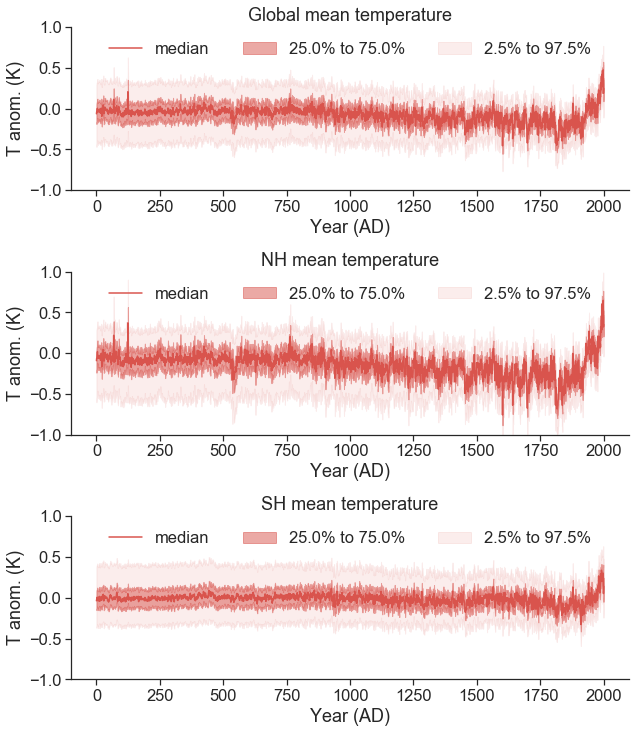

In [2]:
from LMRt import visual as vs
save_dirpath = './results/jobs_All_multiprocessing'
fig = vs.plot_ts_from_jobs(save_dirpath)